In [1]:
import glob
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage.feature import hog
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
from sklearn import *

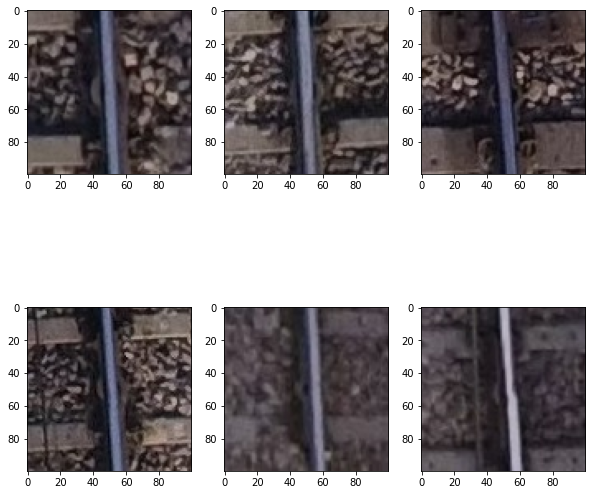

In [2]:
f,axes= plt.subplots(2,3, figsize=(10,10))
row=0
templates=[]

for index in range(6):
    template= cv2.cvtColor(cv2.imread("C:/Users/hp/Desktop/Mod1-IITR/fishplate/pos/"+str(index+1)+".jpg"),cv2.COLOR_BGR2RGB)
    templates.append(template)
    axes[index//3, index%3].imshow(template)

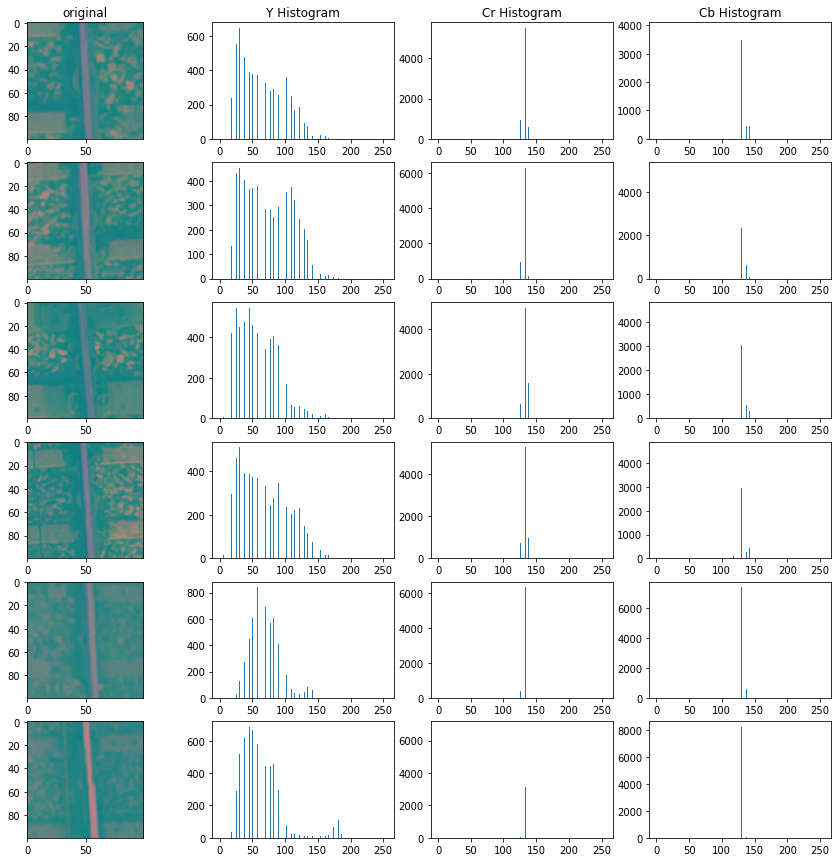

In [3]:
f,axes= plt.subplots(len(templates),4, figsize=(15,15))
row=0
for template in templates:
    template= cv2.cvtColor(template,cv2.COLOR_RGB2YCrCb)
    bin_count=64
    rhist = np.histogram(template[:,:,0], bins=bin_count, range=(0, 256))
    ghist = np.histogram(template[:,:,1], bins=bin_count, range=(0, 256))
    bhist = np.histogram(template[:,:,2], bins=bin_count, range=(0, 256))
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    axes[row,0].imshow(template)
    axes[0,0].set_title("original")
    
    axes[row,1].bar(bin_centers, rhist[0])
#     axes[row,1].xlim(0, 256)
    axes[0,1].set_title('Y Histogram')

    axes[row,2].bar(bin_centers, ghist[0])
#     axes[row,2].xlim(0, 256)
    axes[0,2].set_title('Cr Histogram')

    axes[row,3].bar(bin_centers, bhist[0])
#     axes[row,3].xlim(0, 256)
    axes[0,3].set_title('Cb Histogram')

    row+=1

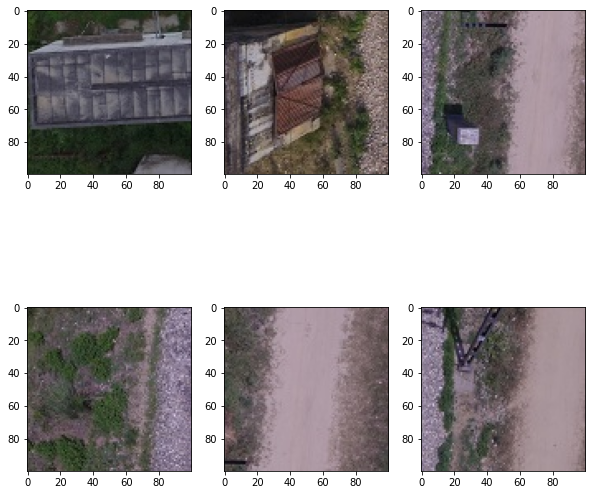

In [4]:
f,axes= plt.subplots(2,3, figsize=(10,10))

non_fishplates_images=[]
import glob
non_fishplate= glob.glob('C:/Users/hp/Desktop/Mod1-IITR/fishplate/neg/*.jpg')
for index in range(6):
    extra= cv2.cvtColor(cv2.imread(non_fishplate[index]),cv2.COLOR_BGR2RGB)
    non_fishplates_images.append(extra)
    axes[index//3, index%3].imshow(extra)

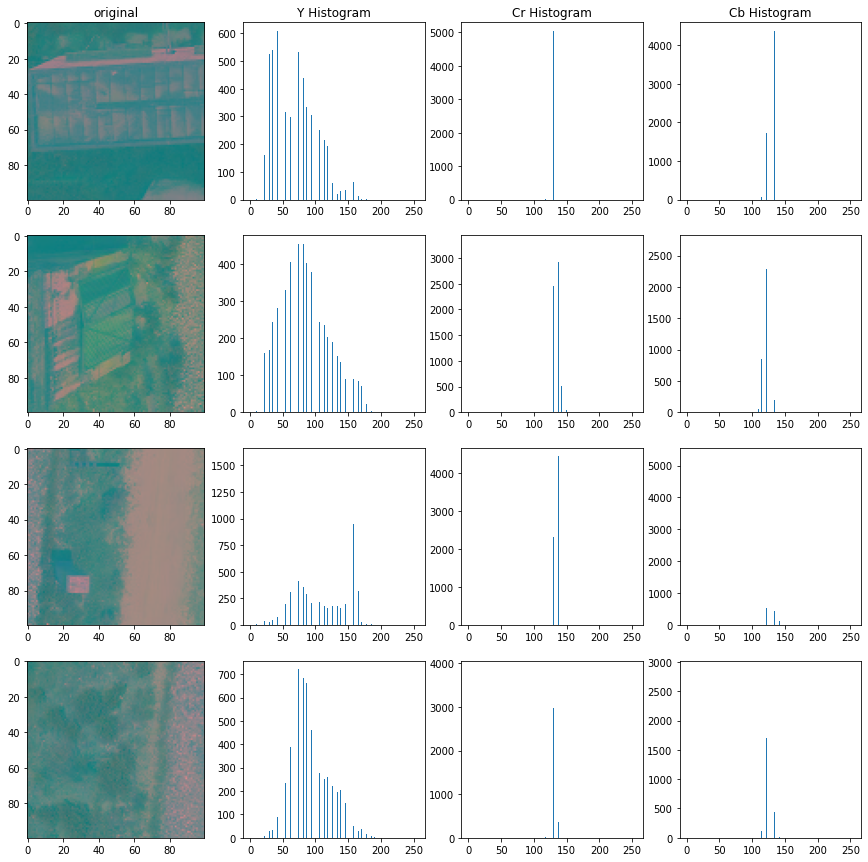

In [5]:
f,axes= plt.subplots(4,4, figsize=(15,15))
row=0
for extra in non_fishplates_images[0:4]:
    extra= cv2.cvtColor(extra,cv2.COLOR_RGB2YCrCb)
    bin_count=64
    rhist = np.histogram(extra[:,:,0], bins=bin_count, range=(0, 256))
    ghist = np.histogram(extra[:,:,1], bins=bin_count, range=(0, 256))
    bhist = np.histogram(extra[:,:,2], bins=bin_count, range=(0, 256))
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    axes[row,0].imshow(extra)
    axes[0,0].set_title("original")
    
    axes[row,1].bar(bin_centers, rhist[0])
#     axes[row,1].xlim(0, 256)
    axes[0,1].set_title('Y Histogram')

    axes[row,2].bar(bin_centers, ghist[0])
#     axes[row,2].xlim(0, 256)
    axes[0,2].set_title('Cr Histogram')

    axes[row,3].bar(bin_centers, bhist[0])
#     axes[row,3].xlim(0, 256)
    axes[0,3].set_title('Cb Histogram')

    row+=1

In [6]:
from skimage.feature import hog
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),transform_sqrt=False, 
                                  visualize=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block),transform_sqrt=False, 
                       visualize=vis, feature_vector=feature_vec)
        return features

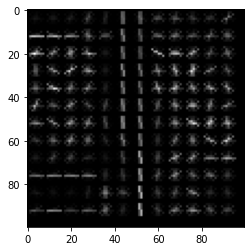

In [7]:
image = cv2.imread('C:/Users/hp/Desktop/Mod1-IITR/fishplate/pos/1.jpg')
feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
x,y = get_hog_features(feature_image[:,:,0], 9, 
                        8, 2, vis=True, feature_vec=True)
plt.imshow(y, cmap='gray')

In [8]:
fishplates_folders = ['C:/Users/hp/Desktop/Mod1-IITR/fishplate/pos']
non_fishplates_folders = ['C:/Users/hp/Desktop/Mod1-IITR/fishplate/neg']

def prepare_images_for_processing(fishplates_img_folders, non_fishplates_img_folders, image_type):
    fishplates = []
    for folder in fishplates_img_folders:
        fishplates += glob.glob(folder +'/*.' + image_type)
        
    non_fishplates = []
    for folder in non_fishplates_img_folders:
        non_fishplates += glob.glob(folder +'/*.' + image_type)

    print("Fishplates len: ", len(fishplates))
    print("Non fishplates len: ", len(non_fishplates))

In [9]:

non_fishplates_folders = ["C:/Users/hp/Desktop/Mod1-IITR/fishplate/neg"]


fishplates = []
for folder in glob.glob('C:/Users/hp/Desktop/Mod1-IITR/fishplate/pos/*.jpg'):
    n= cv2.imread(folder)
    fishplates.append(n)
    
        
non_fishplates = []
for folder in glob.glob('C:/Users/hp/Desktop/Mod1-IITR/fishplate/neg/*.jpg'):
    n= cv2.imread(folder)
    non_fishplates.append(n)
    
print("Fishplates len: ", len(fishplates))
print("Non fishplates len: ", len(non_fishplates))

Fishplates len:  40
Non fishplates len:  40


In [10]:
fplate = []
nonfplate = []
fplate=fishplates
nonfplate=non_fishplates
print(len(nonfplate)+len(fplate))

80


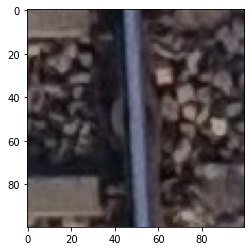

In [11]:
test_img_loc = 'C:/Users/hp/Desktop/Mod1-IITR/fishplate/pos/1.jpg'
feature_image = cv2.imread(test_img_loc)
feature_image = cv2.cvtColor(feature_image, cv2.COLOR_BGR2RGB)
plt.imshow(feature_image)
plt.show()

In [12]:
def image_features(img, color_space='RGB', size=(32, 32)):
            
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    return hist_features

def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256),
                        orient=9,pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True, class_type='S'
                    ):
    # Create a list to append feature vectors to
    features = []
    
    for img in imgs:
        image_orig= cv2.imread(img)
        images=[image_orig]
        image_flipped= cv2.flip(image_orig,1)
        images.append(image_flipped)
#         if class_type=='C': 
#             images.append(cv2.resize(image_orig,(72,72))[0:64,0:64])
#             images.append(cv2.resize(image_flipped,(72,72))[0:64,0:64])
            
        for image in images:
            feature_image=None
            if color_space != 'RGB':
                if color_space == 'HSV':
                    feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
                elif color_space == 'LUV':
                    feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
                elif color_space == 'HLS':
                    feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
                elif color_space == 'YUV':
                    feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
                elif color_space == 'YCrCb':
                    feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
            else: feature_image = np.copy(image) 
            image_feature=[]
            if spatial_feat==True:
                image_feature= image_features(feature_image, color_space, spatial_size) 

            histogram_features=[]
            if hist_feat==True:
                histogram_features= color_hist(feature_image, hist_bins, hist_range)

            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
    #         print(hog_features[0])
    #         features.append(hog_features)
            features.append(np.concatenate((image_feature, histogram_features,hog_features)))

       
    return features

In [13]:
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5), offset=0):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = (img.shape[0]//2)+offset #(img.shape[0]*2//3)+20
#         print((img.shape[0]//2)-100)
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]

    window_list = []

    
    scales=[1,1.5,2,2.5]
    ystart=y_start_stop[0]
    for scale in scales:
        over_x= xy_overlap[0]
        over_y= xy_overlap[1]
        width= xy_window[0]*scale
        height= xy_window[1]*scale
        c= y_start_stop[0]
        
        for row in range(2):
            col=0
            endx=0
            image_width= img.shape[1]
            
            while(endx<image_width):
                
                startx = x_start_stop[0]+ col*width*(1-over_x)
                endx = startx + width
                starty = ystart+ row*height*(1-over_y)
                endy = starty + height
                if(endx-startx==endy-starty and endx-startx!=0):
#                     print(endx-startx, endy-starty)
                    window_list.append(((int(startx), int(starty)), (int(endx), int(endy)), width/64.0))
                col+=1
#         y_start_stop[0]-=5    
    return window_list

In [14]:
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5), offset=0):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = (img.shape[0]//2)+offset #(img.shape[0]*2//3)+20
#         print((img.shape[0]//2)-100)
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]

    window_list = []

    
    scales=[1,1,1.5,1.5]
    ystart=y_start_stop[0]
    for scale in scales:
        over_x= xy_overlap[0]
        over_y= xy_overlap[1]
        width= xy_window[0]*scale
        height= xy_window[1]*scale
        c= y_start_stop[0]
        
        for row in range(2):
            col=0
            endx=0
            image_width= img.shape[1]
            
            while(endx<image_width):
                
                startx = x_start_stop[0]+ col*width*(1-over_x)
                endx = startx + width
                starty = ystart+ row*height*(1-over_y)
                endy = starty + height
                if(endx-startx==endy-starty and endx-startx!=0):
#                     print(endx-startx, endy-starty)
                    window_list.append(((int(startx), int(starty)), (int(endx), int(endy)), width/64.0))
                col+=1
#         y_start_stop[0]-=5    
    return window_list

In [41]:
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 12  # HOG orientations
pix_per_cell = 16 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 0 # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [500, 550] # Min and max in y to search in slide_window()

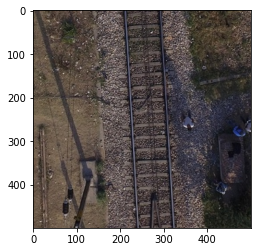

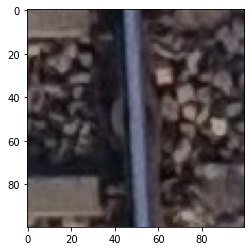

In [42]:
# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy


test_img = 'C:/Users/hp/Desktop/Mod1-IITR/test/3.jpg'
img = cv2.imread(test_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

windows = slide_window(feature_image, x_start_stop=[None, None], y_start_stop=y_start_stop)              
window_img = draw_boxes(feature_image, windows, color=(0, 0, 255), thick=6)  
plt.imshow(window_img)
plt.show()

In [43]:
def prepare_images_for_processing(fplate_img_folders, nonfplate_img_folders, image_type):
    fplate = []
    for folder in fplate_img_folders:
        fplate += glob.glob(folder +'/*.' + image_type)
        
    nonfplate = []
    for folder in nonfplate_img_folders:
        nonfplate += glob.glob(folder +'/*.' + image_type)

    print("Fishplates len: ", len(fplate))
    print("Non Fishplates len: ", len(nonfplate))

    # Keep distribution even
    train_size = 10
    fplate = fplate[:train_size]
    nonfplate = nonfplate[:train_size]
    
    fplate_features = extract_features(fplate, color_space=color_space, 
        spatial_size=spatial_size, hist_bins=hist_bins, 
        orient=orient, pix_per_cell=pix_per_cell, 
        cell_per_block=cell_per_block, 
        hog_channel=hog_channel, spatial_feat=spatial_feat, 
        hist_feat=hist_feat, hog_feat=hog_feat)
    nonfplate_features = extract_features(nonfplate, color_space=color_space, 
        spatial_size=spatial_size, hist_bins=hist_bins, 
        orient=orient, pix_per_cell=pix_per_cell, 
        cell_per_block=cell_per_block, 
        hog_channel=hog_channel, spatial_feat=spatial_feat, 
        hist_feat=hist_feat, hog_feat=hog_feat)

    X = np.vstack((fplate_features, nonfplate_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)

    # Define the labels vector
    y = np.hstack((np.ones(len(fplate_features)), np.zeros(len(nonfplate_features))))
    
    return scaled_X, y, X_scaler

In [44]:
fplate_folders = ['C:/Users/hp/Desktop/Mod1-IITR/fishplate/pos']
nonfplate_folders = ['C:/Users/hp/Desktop/Mod1-IITR/fishplate/neg']
scaled_X, y, X_scaler = prepare_images_for_processing(fplate_folders, nonfplate_folders, "jpg")
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 6)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

Fishplates len:  40
Non Fishplates len:  40
Using: 12 orientations 16 pixels per cell and 2 cells per block
Feature vector length: 4368
0.02 Seconds to train SVC...
Test Accuracy of SVC =  1.0


In [45]:
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
#         print(feature_image)
        
        spatial_features = image_features(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
       
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

In [46]:
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    last_ratio=0
    i=0
    imageCopy= np.copy(img)
    for window in windows:
#         print(window)
        if(last_ratio!= window[2]):
            last_ratio=window[2]
#             plt.imshow(imageCopy)
#             print((img.shape[0]//last_ratio, img.shape[1]//last_ratio))
            imageCopy= cv2.resize(img, (int(img.shape[1]/last_ratio), int(img.shape[0]/last_ratio))) 
        #3) Extract the test window from original image
#         print(window[2])
#         test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))
#         print(img.shape)
        test_img = imageCopy[int(window[0][1]/last_ratio):int(window[1][1]/last_ratio), int(window[0][0]/last_ratio):int(window[1][0]/last_ratio)]
        if test_img.shape[0]==test_img.shape[1] and test_img.shape[0]!=0:
            
#             plt.imshow(test_img)
#             if i==2:
#                 break
#             i+=1
#             print(test_img.shape, last_ratio)
        #4) Extract features for that window using single_img_features()
            features = single_img_features(test_img, color_space=color_space, 
                                spatial_size=spatial_size, hist_bins=hist_bins, 
                                orient=orient, pix_per_cell=pix_per_cell, 
                                cell_per_block=cell_per_block, 
                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                hist_feat=hist_feat, hog_feat=hog_feat)
            #5) Scale extracted features to be fed to classifier
    #         print(features)
            test_features = scaler.transform(np.array(features).reshape(1, -1))
    #         print(test_features)
            #6) Predict using your classifier
            prediction = clf.predict (test_features)

    #         #7) If positive (prediction == 1) then save the window
#             if prediction == 1:
            prob = clf.decision_function(test_features)
            window1=(window[0],window[1],prob)
            if(prob>1.5):
                on_windows.append(window1)
    #8) Return windows for positive detections
    return on_windows

In [47]:
%%time
from sklearn.svm import LinearSVC

print('training started') 
clf = LinearSVC()
LinearSVC( 
            C=1000.0  
    #loss='hinge'
          #, gamma='auto'
          #, kernel='linear'
         )

clf.fit(X_train, y_train)
print('Test Accuracy of SVC = ', round(clf.score(X_test, y_test), 4))

training started
Test Accuracy of SVC =  1.0
Wall time: 26.1 ms


In [48]:
#----------------------------------------------------------try 1

In [49]:
from scipy.ndimage.measurements import label
heat = np.zeros_like(image[:,:,0]).astype(np.float)

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected fplates
    coord=[]
    for fplate_number in range(1, labels[1]+1):
        # Find pixels with each fplate_number label value
        nonzero = (labels[0] == fplate_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        point=(np.min(nonzerox), np.min(nonzeroy)-20)
        text= 'fishplate '+ str(fplate_number)
#         cv2.putText(img,text,point, cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,255,0),2,cv2.LINE_AA)
        # Draw the box on the image
        aspect_ratio= float(bbox[1][0]-bbox[0][0])/(bbox[1][1]-bbox[0][1])
        if(aspect_ratio>=0.8 ):
            
            coord.append((bbox[0], bbox[1]))
    # Return the image
    return img, coord

def draw_objects(coords, draw_img):
    out_image = np.zeros((720,1280,3), dtype=np.uint8)
    index=1
    out_image[0:720,0:1280,:] = cv2.resize(draw_img,(1280,720)) 
    offset_left=30
    offset_start=30
    mid_gap=40
    
    for coord in coords:
        if(index<4):
            x_start= coord[0][0]
            y_start= coord[0][1]
            x_end= coord[1][0]
            y_end= coord[1][1]
            if x_end-x_start>70 and y_end-y_start>50:
                aspect_ratio= float(x_end-x_start)/(y_end-y_start)

                detected_image = np.zeros((150,220,3), dtype=np.uint8)
                if(aspect_ratio>=0.8 and aspect_ratio<=4):
                    detected_image= cv2.resize(draw_img[y_start+5:max(y_end-5,y_start+80),x_start+5:max(x_end-5,x_start+115)],(220,150))
                    cv2.rectangle(out_image,(offset_left-2,offset_start-2),(offset_left+222,offset_start+152 ), (255,255,255), 3)
                else:
                    cv2.putText(detected_image,'Bad Quality ',(50,80), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(255,0,0),2,cv2.LINE_AA)
                    cv2.rectangle(out_image,(offset_left-2,offset_start-2),(offset_left+222,offset_start+152 ), (255,0,0), 3)
                cv2.rectangle(out_image, coord[0], coord[1], (226,203,255), 6)
                out_image[offset_start:offset_start+150,offset_left:offset_left+220,:] = cv2.resize(detected_image,(220,150))
                cv2.putText(out_image,'fplate '+str(index)+' detected',(offset_left,offset_start-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6,(255,255,255),2,cv2.LINE_AA)
                offset_start+=150+mid_gap
        index+=1
    return out_image

ValueError: X has 3600 features, but this StandardScaler is expecting 4368 features as input.

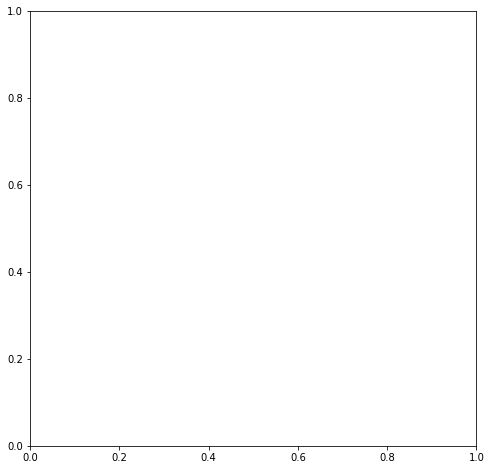

In [50]:
images = 'C:/Users/hp/Desktop/Mod1-IITR/test/3.jpg'

f,axes= plt.subplots(1,1, figsize=(8,8))
 
image = cv2.imread(images)

draw_image = np.copy(image)
windows = slide_window(draw_image, x_start_stop=[None, None], y_start_stop=[None, None], 
                       xy_window=(72, 72), xy_overlap=(0.9,0.9), offset=50)
    
#     print(len(windows))
hot_windows = search_windows(image, windows, clf, X_scaler, color_space=color_space, 
                             spatial_size=spatial_size, hist_bins=hist_bins, 
                             orient=orient, pix_per_cell=pix_per_cell, 
                             cell_per_block=cell_per_block, 
                             hog_channel=hog_channel, spatial_feat=spatial_feat, 
                             hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    
window_img= cv2.cvtColor(window_img, cv2.COLOR_BGR2RGB)
axes.imshow(window_img)
heat = np.zeros_like(image[:,:,0]).astype(np.float)
heat = add_heat(heat,hot_windows)
    
    # Apply threshold to help remove false positives
heat = apply_threshold(heat,3) 
heatmap = np.clip(heat, 0, 255)
axes.imshow(heatmap)
    # Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img,coord = draw_labeled_bboxes(np.copy(image), labels)
axes.imshow(labels[0], cmap='gray')
draw_img= draw_objects(coord, cv2.cvtColor(draw_img,cv2.COLOR_BGR2RGB))
axes.imshow(draw_img)

# print(windows)


In [40]:
#----------------------------------------------------------try 2